In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp

## Part 1

In [2]:
def _XDot(X, Y, sig):
    return -sig*(X-Y)

def _YDot(X, Y, Z, r):
    return r*X - Y - X*Z

def _ZDot(X, Y, Z, b):
    return -b*Z + X*Y

def WDot(t, W, sig, r, b):
    X, Y, Z = W
    return [_XDot(X, Y, sig), _YDot(X, Y, Z, r), _ZDot(X, Y, Z, b)]
    

In [3]:
W0 = [0., 1., 0.]
init = [10., 28., 8/3] # [sigma, r b]

## Parts 2 and 3

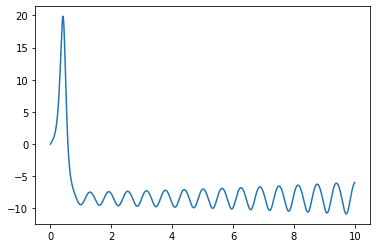

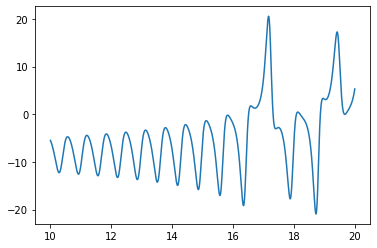

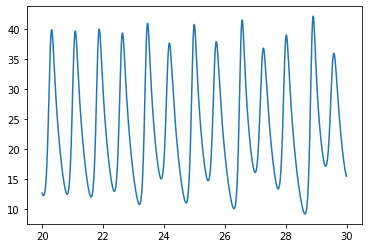

In [4]:
# W = [X, Y, Z]
t_final = 60
sol = solve_ivp(WDot, t_span = [0, t_final], y0 = W0, args = init, dense_output = True)


N = int(1e6)

t_arr = np.linspace(0, 10, N)
W = sol.sol(t_arr)


# X
X, Y, Z = W
plt.figure()
plt.plot(t_arr, X)

# Y
t_arr = np.linspace(10, 20, N)
W = sol.sol(t_arr)
X, Y, Z = W
plt.figure()
plt.plot(t_arr, Y)

# z
t_arr = np.linspace(20, 30, N)
W = sol.sol(t_arr)
X, Y, Z = W
plt.figure()
plt.plot(t_arr, Z)


## Part 4

In [5]:
t_arr = np.linspace(14, 19, N)
W = sol.sol(t_arr)
X, Y, Z = W
# Y = - Y # Fixed all my problems

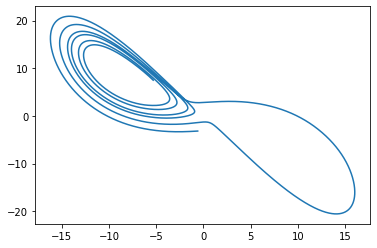

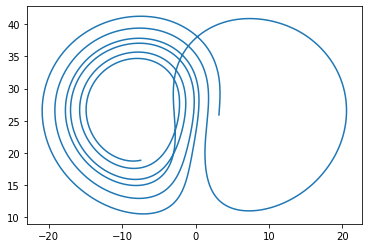

In [6]:
plt.figure()
plt.plot(X, -Y)

plt.figure()
plt.plot(Y, Z)

In [7]:
W02 = np.array([0., 1., 0.]) + np.array([0, 1e-8, 0])
init = [10., 28., 8/3] # [sigma, r b]
t_final = 60
sol2 = solve_ivp(WDot, t_span = [0, t_final], y0 = W02, args = init, dense_output = True)

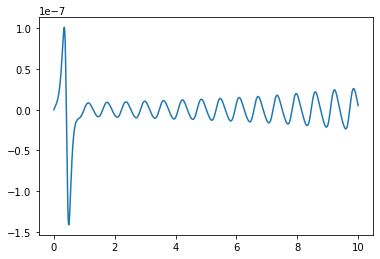

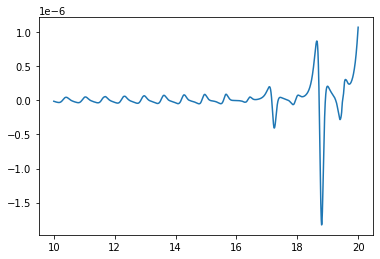

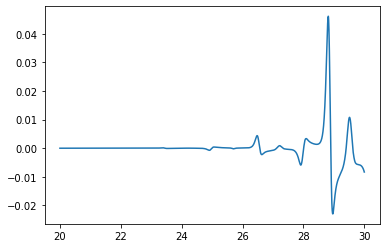

In [8]:
N = int(1e6)

t_arr = np.linspace(0, 10, N)
W2 = sol2.sol(t_arr)


# X
X2, Y2, Z2 = W2
W = sol.sol(t_arr)
X = W[0]
plt.figure()
plt.plot(t_arr, X2-X)

# Y
t_arr = np.linspace(10, 20, N)
W2 = sol2.sol(t_arr)
W = sol.sol(t_arr)
X, Y, Z = W
X2, Y2, Z2 = W2
plt.figure()
plt.plot(t_arr, Y2-Y)

# z
t_arr = np.linspace(20, 30, N)
W2 = sol2.sol(t_arr)
X2, Y2, Z2 = W2
W = sol.sol(t_arr)
X, Y, Z = W
plt.figure()
plt.plot(t_arr, Z2-Z)